###### Importing relevant packages

In [1]:
import keras
from tqdm import tqdm
import pandas as pd
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Convolution1D, GlobalMaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.models import load_model
import tensorflow as tf
from matplotlib import pyplot


###### Loading Train and Test Data

In [2]:
train_df = pd.read_csv("train.csv")

train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### Extracting Training Feature data and converting to array of shape 28*28 (pixels)

In [3]:
X = train_df.iloc[:,1:].to_numpy();

x=[];
for i in range(0,len(X)):
    x.append(np.reshape(X[i],(-1,28)));
    
X = np.array(x);

X.shape

(42000, 28, 28)

###### Extracting Target data from training dataset

In [4]:
y = train_df.iloc[:,0].to_numpy();

y.shape

(42000,)

###### Splitting Training data into Training and Cross-Validation dataset

In [5]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.25, random_state=42)

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(31500, 28, 28), y=(31500,)
Test: X=(10500, 28, 28), y=(10500,)


###### Displaying sample images from Training data set

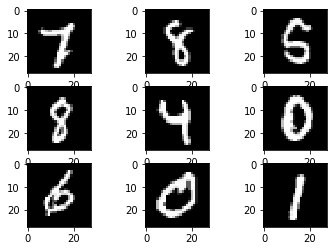

In [6]:
#plot first few images
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
    
pyplot.show()

###### Reshaping Training, Cross-Validation & Testing data to add Channels (1: GrayScale Image, 3: RGB Image)

In [8]:
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1);
testX = testX.reshape(testX.shape[0], 28, 28, 1);

print('Training Dataset:', trainX.shape)
print('Cross-Validation Dataset:', testX.shape)

Training Dataset: (31500, 28, 28, 1)
Cross-Validation Dataset: (10500, 28, 28, 1)


###### Converting data values to float and dividing it with 255 (i.e. max pixel value) in order to keep them between 0 and 1

In [9]:
trainX = trainX.astype('float32');
testX = testX.astype('float32');

trainX = trainX/255;
testX = testX/255;

###### Converting testing data to Categorical data

In [10]:
trainy = to_categorical(trainy);
testy = to_categorical(testy);

trainy

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

###### Creating CNN model

In [11]:
input_shape = trainX.shape[1:];

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)));
model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(2, 2)));

model.add(Conv2D(128, (3, 3)));
model.add(Activation('relu'));

model.add(Conv2D(64, (3, 3)));
model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(1, 1)));
model.add(Dropout(0.25));

model.add(Flatten());
model.add(Dense(512));
model.add(Activation('relu'));
model.add(Dropout(0.5));

model.add(Dense(10));
model.add(Activation('softmax'));

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

###### Setting Optimizer and Compiling Model

In [12]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6);

model.compile(optimizer = opt,
              loss='categorical_crossentropy',
              metrics = ['accuracy']);

###### Training Model

In [13]:
#Using epoch as 10 i.e. Training Model for 10 cyles

model.fit(x=trainX, y=trainy, epochs=10);

Epoch 1/10
985/985 [==============================] - 15s 15ms/step - loss: 0.9176 - accuracy: 0.7090
Epoch 2/10
985/985 [==============================] - 17s 17ms/step - loss: 0.2815 - accuracy: 0.9118
Epoch 3/10
985/985 [==============================] - 14s 14ms/step - loss: 0.1804 - accuracy: 0.9454
Epoch 4/10
985/985 [==============================] - 14s 15ms/step - loss: 0.1358 - accuracy: 0.9600
Epoch 5/10
985/985 [==============================] - 14s 15ms/step - loss: 0.1064 - accuracy: 0.9681
Epoch 6/10
985/985 [==============================] - 15s 15ms/step - loss: 0.0934 - accuracy: 0.9723
Epoch 7/10
985/985 [==============================] - 15s 16ms/step - loss: 0.0791 - accuracy: 0.9766
Epoch 8/10
985/985 [==============================] - 15s 15ms/step - loss: 0.0682 - accuracy: 0.9801
Epoch 9/10
985/985 [==============================] - 18s 18ms/step - loss: 0.0629 - accuracy: 0.9807
Epoch 10/10
985/985 [==============================] - 18s 19ms/step - loss: 0.060

###### Evaluating Model based on Cross-Validation Dataset

In [14]:
model.evaluate(testX, testy)

329/329 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9847


[0.0520625114440918, 0.984666645526886]

###### Predicting Numbers

In [15]:
pred = model.predict(testX)

predictions = np.argmax(pred, axis=1);

predictions

array([8, 1, 9, ..., 7, 4, 4])

In [16]:
testy = np.argmax(testy, axis=1)

testy

array([8, 1, 9, ..., 7, 4, 4])

###### Validating Prediction Success Rate

In [17]:
result = pd.DataFrame({'testy' : testy, 'Predictions' : predictions})

result = result[result["testy"] == result["Predictions"]]

SuccessRate = len(result)/len(testX) * 100;

SuccessRate

98.46666666666667